In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [26]:
img = cv2.imread('Luciano Lopes De Sousa - lena_gray.jpg', cv2.IMREAD_GRAYSCALE)

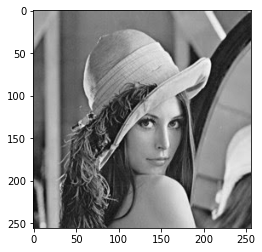

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
def getWindowIndexs(x, y):  
    """Função responsável por pegar os indexs de uma janela 3x3 de um determinado pixel"""
    windowIndex = []
    
    windowIndex.append([(x-1, y-1), (x-1, y), (x-1,y+1)])
    windowIndex.append([(x, y-1), (x, y), (x,y+1)])
    windowIndex.append([(x+1, y-1), (x+1, y), (x+1,y+1)])
    
    return windowIndex
        
getWindowIndexs(0, 0)

[[(-1, -1), (-1, 0), (-1, 1)],
 [(0, -1), (0, 0), (0, 1)],
 [(1, -1), (1, 0), (1, 1)]]

In [5]:
def getWindowMatrix(img:np.ndarray, pixel:tuple) -> np.ndarray:
    """Função responsável por pegar os valores dos pixels do janelamento 3x3 de uma imagem"""
    
    #Pega os indexes do janelamento do pixel passado como parâmetro
    windowIndex = getWindowIndexs(pixel[0], pixel[1])
    #cria uma função 3x3 correspondente ao janelamento
    window = np.zeros((3,3))
    
    #Para cada posição do pixel do janelamento, atribui o pixel correspondente na imagem.
    #Caso o index do janelamento for negativo ou maior que o tamanho da imagem, essa posição
    #continua com zero
    for idxI, i in enumerate(windowIndex):
        for idxJ, j in enumerate(i):
            x = j[0]
            y = j[1]
            
            if (x > -1 and x < img.shape[0]) and (y > -1 and y < img.shape[1]):
                window[idxI][idxJ] = img[x][y]
            
    return window
    
getWindowMatrix(img, (0,0))

array([[  0.,   0.,   0.],
       [  0., 161., 161.],
       [  0., 161., 161.]])

In [6]:
def filterImage(img:np.ndarray, mask:np.ndarray) -> np.ndarray:
    """Aplica a máscara em uma imagem"""
    
    img_mask = np.zeros((img.shape[0], img.shape[1]))
    
    #percorre o pixel da imagem, extrai o janelamento para cada pixel e aplica a convolução
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            #multiplicando o janelamento da imagem pela máscara e, logo após, faz-se a soma dos valores
            img_mask[i][j] = np.multiply(mask, getWindowMatrix(img, (i,j))).sum()
            
    return img_mask

# Atividade de Filtragem Espacial

### 1) Crie uma função que receba como parâmetros uma imagem e uma máscara e  retorna a convolução daquela máscara sobre a imagem. Teste na imagem  “lena_ruido.bmp” para as seguintes máscaras

![alt text](./masks.png "Title")

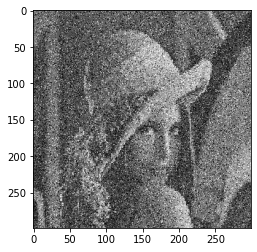

In [7]:
lena_ruido = cv2.imread('Luciano Lopes De Sousa - lena_ruido.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena_ruido, cmap='gray')

In [8]:
mask1 = np.array([[0,1,0],
                 [1,1,1],
                 [0,1,0]])/5

mask2 = np.ones((3,3))/9

mask3 = np.array([[1,3,1],
                 [3,16,3],
                 [1,3,1]])/32

mask4 = np.array([[0,1,0],
        [1,4,1],
        [0,1,0]])/8

### Plotando os resultados

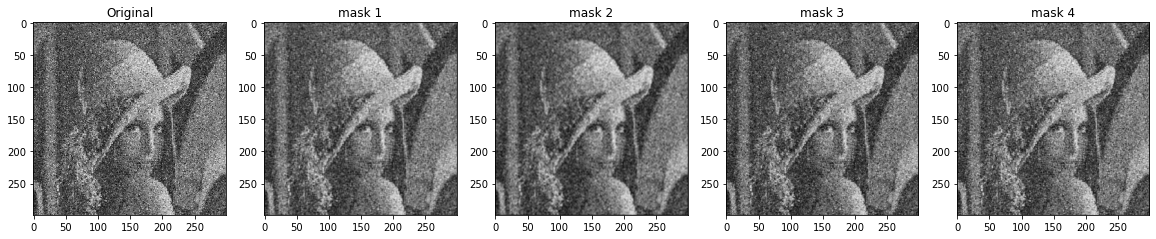

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
ax[0].imshow(lena_ruido, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(filterImage(lena_ruido, mask1), cmap='gray')
ax[1].set_title('mask 1')
ax[2].imshow(filterImage(lena_ruido, mask2), cmap='gray')
ax[2].set_title('mask 2')
ax[3].imshow(filterImage(lena_ruido, mask3), cmap='gray')
ax[3].set_title('mask 3')
ax[4].imshow(filterImage(lena_ruido, mask4), cmap='gray')
ax[4].set_title('mask 4')
plt.show()

### 2) Implemente e aplique o filtro da mediana 3x3 na imagem “lena_ruido.bmp”.  Compare o resultado com uma das máscaras do exercício anterior. 

In [10]:
mask_mediana = np.ones((3, 3))/9
mask_mediana2 = np.array([[1,2,1],
                         [2,4,2],
                         [1,2,1]])/16

Text(0.5, 1.0, 'Máscara mediana 2')

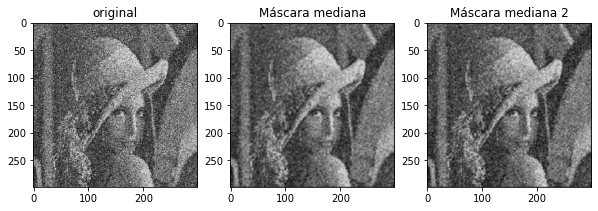

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
ax[0].imshow(lena_ruido, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(filterImage(lena_ruido, mask_mediana), cmap='gray')
ax[1].set_title('Máscara mediana')
ax[2].imshow(filterImage(lena_ruido, mask_mediana2), cmap='gray')
ax[2].set_title('Máscara mediana 2')

### 3) Compare os resultados da sua função convolução com a função filter2. 

Text(0.5, 1.0, 'mask 4 opencv')

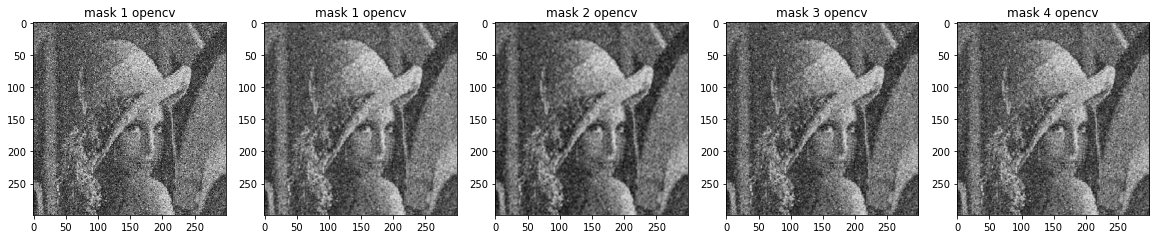

In [12]:
fig2, ax2 = plt.subplots(1, 5, figsize=(20, 20))
ax2[0].imshow(lena_ruido, cmap='gray')
ax2[0].set_title('mask 1 opencv')
ax2[1].imshow(cv2.filter2D(lena_ruido, -1, mask1), cmap='gray')
ax2[1].set_title('mask 1 opencv')
ax2[2].imshow(cv2.filter2D(lena_ruido, -1, mask2), cmap='gray')
ax2[2].set_title('mask 2 opencv')
ax2[3].imshow(cv2.filter2D(lena_ruido, -1, mask3), cmap='gray')
ax2[3].set_title('mask 3 opencv')
ax2[4].imshow(cv2.filter2D(lena_ruido, -1, mask4), cmap='gray')
ax2[4].set_title('mask 4 opencv')

### 4) Dada a imagem “lena_gray.bmp”, realize as seguinte operações:

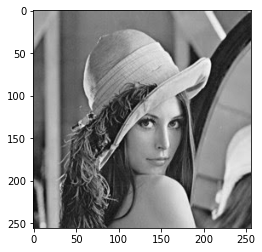

In [35]:
lena_gray = cv2.imread('./Luciano Lopes De Sousa - lena_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena_gray, cmap='gray')

#### a) Laplaciano 

In [36]:
mask_laplaciano1 = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])

mask_laplaciano2 = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

mask_laplaciano3 = np.array([[-1, -1, -1], 
                            [-1,  8, -1], 
                            [-1, -1, -1]])


mask_laplaciano4 = np.array([[-1, -1, -1], 
                             [-1,  9, -1], 
                             [-1, -1, -1]]) #reconstrução de fundo

mask_laplaciano5 = np.array([[0, -1, 0], 
                             [-1, 5, -1], 
                             [0, -1, 0]]) #reconstrução de fundo

Text(0.5, 1.0, 'laplaciano 5')

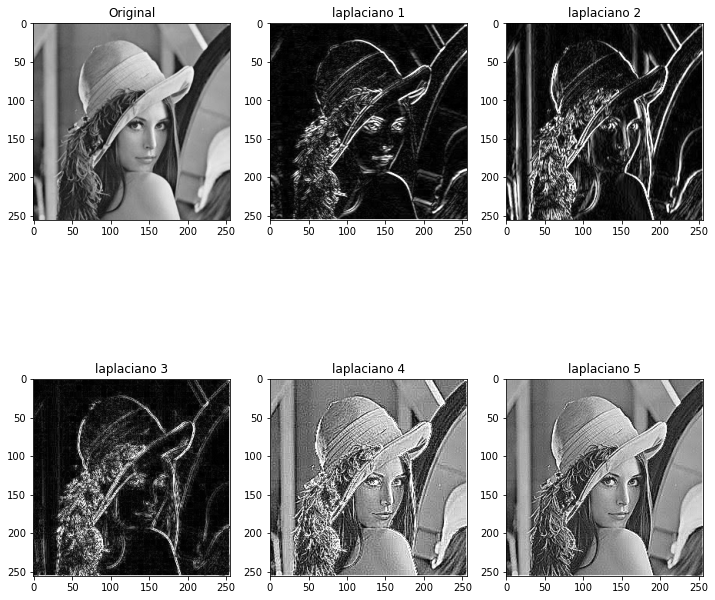

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(12, 12))
ax[0][0].imshow(img, cmap='gray')
ax[0][0].set_title("Original")
ax[0][1].imshow(cv2.convertScaleAbs(filterImage(img, mask_laplaciano1)), cmap='gray')
ax[0][1].set_title('laplaciano 1')
ax[0][2].imshow(cv2.convertScaleAbs(filterImage(img, mask_laplaciano2)), cmap='gray')
ax[0][2].set_title('laplaciano 2')
ax[1][0].imshow(cv2.convertScaleAbs(filterImage(img, mask_laplaciano3)), cmap='gray')
ax[1][0].set_title('laplaciano 3')
ax[1][1].imshow(cv2.convertScaleAbs(filterImage(img, mask_laplaciano4)), cmap='gray')
ax[1][1].set_title('laplaciano 4')
ax[1][2].imshow(cv2.convertScaleAbs(filterImage(img, mask_laplaciano5)), cmap='gray')
ax[1][2].set_title('laplaciano 5')

#### b) Unsharp masking 